# Introduction
Many problems in physics have no time dependence, yet are rich with physical meaning: the gravitational field produced by a massive object, the electrostatic potential of a charge distribution, the displacement of a stretched membrane and the steady flow of fluid through a porous medium ... all these can be modeled by **Poisson's equation**:
$$ \nabla ^2 u = f $$
where the unknown $u$ and the known $f$ are functions of space, in a domain $\Omega$. To find the solution, we require boundary conditions. These could be **Dirichlet boundary conditions**, specifying the value of the solution on the boundary,
$$ u = b_1 : \partial \Omega $$
or **Neumann boundary conditions**, specifying the normal derivative of the solution on the boundary,
$$ \frac{\partial u}{\partial n} = b_1 : \partial \Omega $$
A boundary-value problem consists of finding $u$, given the above information. Numerically, we can do this using **relaxation methods**, which start with an initial guess for $u$ and then iterate towards the solution.

## Laplace Equation
The particular case of $f = 0$ (homogeneous case) results in Laplace's equation:
$$ \nabla ^2 u = 0 $$
The Laplace equation models the equilibrium state of a system under the supplied boundary conditions. <br>
The study of solutions to Laplace's equation is called **potential theory**, and the solutions themselves are often potential fields.

## Heat Equation

In this module, we’ll aim at solving the Laplace equation using a numerical approach (discretization) rather than analytical approach, thereby transforming the continuous form of the calculus into the discrete form of matrix algebra. We’ll solve the heat equation using Euler Method and Finite Difference Method and implement these in Python.

Let's get started!

## Packages ##

First, let's run the cell below to import all the packages that you will need. 
- [numpy](www.numpy.org) is the fundamental numerical library for scientific computing with Python.
- [matplotlib](http://matplotlib.org) is a fundamental library for plotting and visualizing data using Python.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output

%matplotlib inline

## Introduction ##

By the second law of thermodynamics, loosely stated, heat will flow from hotter bodies to adjacent cooler bodies, in proportion to the difference of the temperature and the thermal conductivity of the material between them. In physics and mathematics, the heat equation is a partial differential equation that describes how the distribution of heat evolves over time in a solid medium.

The following is the heat equation in one dimension:
$$ \frac{\partial T}{\partial t}(x,t) = \alpha \frac{\partial^2 T}{\partial x^2} $$

where $\alpha$ is the thermal diffusity of the medium and can be calculated using material properties as follows:
$$ \alpha = \frac{k}{\rho c_p} $$

where $k$ is thermal conductivity, $c_p$ is specific heat capacity and $\rho$ is density.

## Excercise I

*This is something that you've already covered in the videos shared this week, let's quickly go over it.* <br>
Consider a thin rod of length $0.1 m$ with known constant temperature of $40^\circ C$ at one end and $20^\circ C$ at the other end. Given that the thermal diffusivity of the rod is $0.0001 m^2/s$, plot the temperature distribution for $30 s$ of this system.

Initialize the important variables:

In [2]:
# INITIALIZE THE PARAMETERS
length = 0.1             # m, length of the steel rod
T1 = 40                  # degree Celcius, temperature at first end of the rod
T2 = 20                  # degree Celcius, temperature at second end of the rod
alpha = 0.0001           # m^2/s, thermal diffusivity of steel

# INITIALIZE THE HYPERPARAMETERS
n = 20                   # number of nodes in the steel rod, to be used for evaluating derivatives using FDM
T0 = 0                   # degree Celcius, initial temperature at all nodes
dx = length/n            # m, length of each node
t_final = 30             # s, observation period
dt = 0.1                 # s, time step

For the next step, you may find the following functions handy: 
- [np.linspace](https://numpy.org/doc/stable/reference/generated/numpy.linspace.html): Returns evenly spaced numbers over a specified interval. Returns num evenly spaced samples, calculated over the interval [start, stop]. The endpoint of the interval can optionally be excluded. <br>
- [np.arange](https://numpy.org/doc/stable/reference/generated/numpy.arange.html): Returns evenly spaced values within a given interval. <br>
- [np.ones](https://numpy.org/doc/stable/reference/generated/numpy.ones.html): Returns a new array of given shape and type, filled with ones. <br>
- [np.empty](https://numpy.org/doc/stable/reference/generated/numpy.empty.html): Returns a new array of given shape and type, without initializing entries.

Initialize the one-dimensional numpy arrays to store the position, time, temperature and time-derivative of temperature at all nodes:

In [3]:
# 'x' stores the position of all nodes
x = np.linspace(dx/2, length-dx/2, n)

# 't' stores the times of observation
t = np.arange(0, t_final, dt)

# 'T' stores the temperature at all nodes, initialized to T0
T = np.ones(n)*T0

# 'dTdt' stores the time-derivative of temperature at all nodes, initially empty
dTdt = np.empty(n)

Using the **Finite Difference Method**: <br>
Apply the Finite Difference Method to the double derivative of $T$ wrt $x$ as follows:

$$ \frac{\partial T_i}{\partial x} = \frac{T_i - T_{i-1}}{dx}  $$

$$ \frac{\partial T_{i+1}}{\partial x} = \frac{T_{i+1} - T_{i}}{dx} $$

$$ \frac{\partial^2 T_i}{\partial x^2} = \frac{\frac{\partial T_{i+1}}{\partial x} - \frac{\partial T_i}{\partial x}}{dx} = \frac{\frac{T_{i+1} - T_{i}}{dx} - \frac{T_i - T_{i-1}}{dx}}{dx} = -\frac{T_i - T_{i-1}}{(dx)^2} + \frac{T_{i+1} - T_i}{(dx)^2} $$

Subsititute this into RHS of the Heat Equation:

$$ \frac{\partial T_i}{\partial t} = \alpha (-\frac{T_i - T_{i-1}}{(dx)^2} + \frac{T_{i+1} - T_i}{(dx)^2}) $$

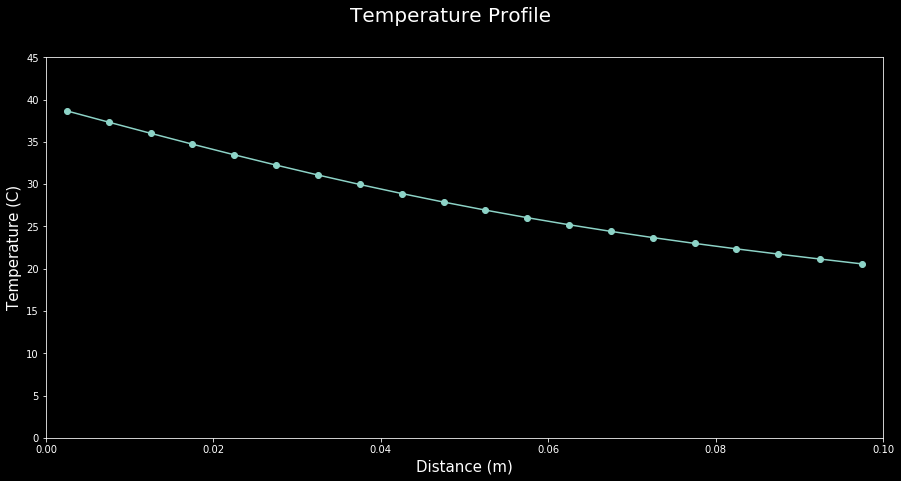

In [4]:
# Iterate over all the time steps
for j in range(1,len(t)):
    
    # Iterate over all the nodes on the rod
    for i in range(1, n-1):  
        
        # Applying Heat Equation to the i'th node
        dTdt[i] = alpha*(-(T[i]-T[i-1])/dx**2 + (T[i+1]-T[i])/dx**2)
        
    # Take care of the boundary nodes seperately
    dTdt[0] = alpha*(-(T[0]-T1)/dx**2 + (T[1]-T[0])/dx**2)             
    dTdt[n-1] = alpha*(-(T[n-1]-T[n-2])/dx**2 + (T2-T[n-1])/dx**2)
    
    # Update the T of all values
    T = T + dTdt*dt
    
    # Plot the results for each time step
    plt.figure(figsize=[15, 7])
    plt.style.use('dark_background')
    plt.suptitle("Temperature Profile", fontsize=20)
    plt.plot(x, T, 'o-')
    plt.axis([0, length, 0, 45])
    plt.xlabel("Distance (m)", fontsize=15)
    plt.ylabel("Temperature (C)", fontsize=15)
    plt.pause(0.001)
    clear_output(wait=True)

In the above animation, note that the temperature at the boundaries is not plotted because we are plotting from $x = \frac{dx}{2}$ to $x = length - \frac{dx}{2}$.

## Excercise II
Find the **steady state** temperature inside a 2-D square plate of edge length $10 cm$ subject to the following boundary conditions: temperature at three edges is maintained at $0^\circ C$ and $100^\circ C$ at the fourth edge.
### Step 1: 
*Discretize the region of the plate and divide it into meshgrid.*
<img src="files/1.png" style="width:400px;height:300px;">
Set $\Delta x = \Delta y = 1 cm$. Note that the green nodes are the nodes where we want to know the temperature (the solution), and the white nodes are the boundary conditions (known temperature). 
<img src="files/2.png" style="width:300px;height:300px;">

### Step 2:
*Discretize the Laplace equation above with Finite Difference Method.* <br>
The Laplace equation in 2-D for Heat Equation is:
$$ \frac{\partial^2 T}{\partial x^2} + \frac{\partial^2 T}{\partial y^2} = 0 $$
where $T$ is temperature, $x$ is x-dimension, and $y$ is y-dimension. <br>
Numerical equivalent of the above laplace equation, using the **Finite Difference Method**:
$$ \frac{T_{i+1,j} - 2T_{i,j} + T_{i-1,j}}{(dx)^2} + \frac{T_{i,j+1} - 2T_{i,j} + T_{i,j-1}}{(dy)^2} = 0 $$

The above equation can be simplified to the following form:
$$ T_{i,j} = \frac{1}{4}(T_{i+1,j} + T_{i-1,j} + T_{i,j+1} + T_{i,j-1}) $$
(note that we have set $dx = dy$ to arrive at this equation.

### Step 3:
*Solve the above equation!* <br> 
To solve this, we use "guess value" of interior grid (green nodes), here we set it to $30^\circ C$ (you may choose any other value), because we don't know the value inside the grid (of course, those are the values that we want to know). Then, we will iterate the equation until the difference between value before iteration and the value after iteration is "small enough", we call it **convergence**. In the process of iterating, the temperature value in the interior grid will adjust itself, it's "selfcorrecting", so when we set a guess value closer to its actual solution, the faster we get the "actual" solution.
<img src="files/3.png" style="width:400px;height:400px;">

### Step 4:
*Import modules and initialize.* <br>
We have already imported the NumPy and Matplotlib libraries. <br>
Initialize all **parameters** and **hyperparameters** into the Python source code.

In [5]:
# Set maximum number of iterations
maxIter = 500

# Set Dimension and delta
lenX = lenY = 11 
delta = 1

# Boundary conditions
Ttop = 100
Tbottom = 0
Tleft = 0
Tright = 0

# Initial guess of interior grid
Tguess = 30

*Set the "plot window" and meshgrid.* <br>
[np.meshgrid()](https://numpy.org/doc/stable/reference/generated/numpy.meshgrid.html) creates the mesh grid (we'll use this to plot the solution), the first parameter is for the x-dimension, and the second parameter is for the y-dimension.  <br>
We use `np.arange(..., ...)` to arrange a 1-D array with element value that starts from some value to some value, in our case, it's from $0$ to $lenX$ and from $0$ to $lenY$. (Recall how we used this method for solving 1D Heat Equation as well!) <br>
The color-interpolation attribute specifies the color space for gradient interpolations. You can find various colormaps in matplotlib [here](https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html).

In [6]:
# Set colour interpolation and colour map
colorinterpolation = 100
colourMap = plt.cm.jet #you can try: colourMap = plt.cm.coolwarm

# Set meshgrid
X, Y = np.meshgrid(np.arange(0, lenX), np.arange(0, lenY))

*Apply the boundary conditions.* <br>
Now we'll set the region: we define 2-D array, define the size and fill the array with guess value. Then we set the boundary conditions.

In [7]:
# Set array size and set the interior value with Tguess
T = np.empty((lenX, lenY))
T.fill(Tguess)

# Set Boundary condition
T[(lenY-1):, :] = Ttop
T[:1, :] = Tbottom
T[:, (lenX-1):] = Tright
T[:, :1] = Tleft

*Iterate using the discretized Laplace equation in 2-D* <br>
Now we are ready to apply our final equation. We iterate the equation using `for` loop.

In [8]:
# Iteration (We assume that the iteration converges in maxIter = 500)
print("Iterating!")
for iteration in range(0, maxIter):
    for i in range(1, lenX-1, delta):
        for j in range(1, lenY-1, delta):
            T[i, j] = 0.25 * (T[i+1][j] + T[i-1][j] + T[i][j+1] + T[i][j-1])

print("Iteration finished.")

Iterating!
Iteration finished.


*Plot the contours.* <br>
Well, the main logic is finished. Next, we write code to plot the solution, using Matplotlib.

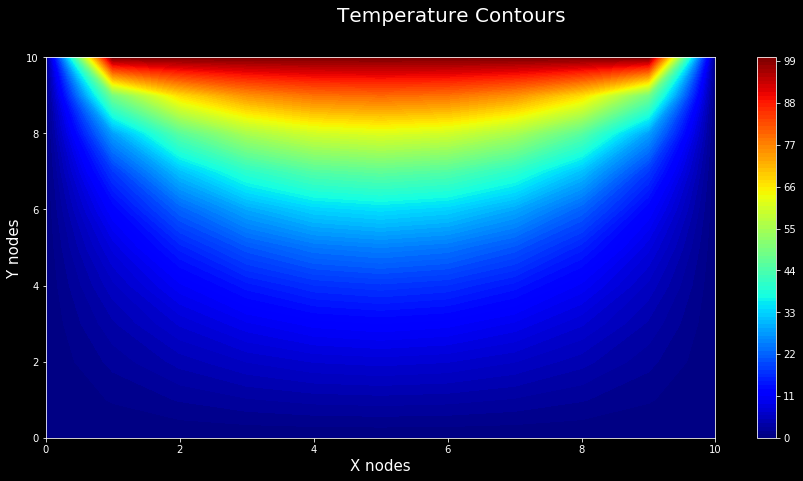

In [9]:
# Configure the contour
plt.figure(figsize=[15, 7])
plt.style.use('dark_background')
plt.suptitle("Temperature Contours", fontsize=20)
plt.contourf(X, Y, T, colorinterpolation, cmap=colourMap)
plt.xlabel("X nodes", fontsize=15)
plt.ylabel("Y nodes", fontsize=15)
# Set Colorbar
plt.colorbar()

## Finite Element Method and ABAQUS *(optional)*
The finite element method (FEM) is the most widely used method for solving problems of engineering and mathematical models. Typical problem areas of interest include the traditional fields of structural analysis, heat transfer, fluid flow, mass transport, and electromagnetic potential. The FEM is a particular numerical method for solving partial differential equations in two or three space variables (i.e., some boundary value problems). To solve a problem, the FEM subdivides a large system into smaller, simpler parts that are called **finite elements**. This is achieved by a particular space discretisation in the space dimensions, which is implemented by the construction of a mesh of the object: the numerical domain for the solution, which has a finite number of points. The finite element method formulation of a boundary value problem finally results in a system of algebraic equations. The method approximates the unknown function over the domain. The simple equations that model these finite elements are then assembled into a larger system of equations that models the entire problem. **ABAQUS** is a software suite for finite element analysis and computer-aided engineering. 

### Introduction to Heat Transfer analysis using ABAQUS
*(Once ABAQUS is installed, this would merely take an hour, just follow the tutorial video provided below.)*

Abaqus, give it a shot!

[SIMULIA How-to Tutorial for Abaqus | Heat Transfer Analysis](https://www.youtube.com/watch?v=IanIaV03ZxE ) shows creating a steady state step, assigning heat flux loads, defining convection and radiation, and visualizing the results such as nodal temperature. Here's an overview of this video:

**Model/Preprocessing**:
- Create a steady state or transient heat transfer step
- Assign heat flux loads and constant temperature boundary conditions
- Use interactions to define convection and radiation heat loss mechanisms
- Modify model attributes to define the Stefan-Boltzmann constant and absolute zero of temperature scale
**Results/Post Processing**: 
- Display nodal temperatures as a color contour using the mend and the “Field Output” toolbar
- Use the “Views” toolbar to orient the viewpoint display and save custom views

Have fun :)

## Advanced Reading Material *(optional)*
- [P-SV wave propagation in heterogeneous media: Velocity-Stress Finite Difference Method](https://library.seg.org/doi/abs/10.1190/1.1442147)
- [An integrated Finite Difference Method for Analyzing Fluid Flow in Porous Media](https://agupubs.onlinelibrary.wiley.com/doi/abs/10.1029/WR012i001p00057)
- [Compact Finite Difference Method for the Fractional Diffusion Equation](https://www.sciencedirect.com/science/article/pii/S0021999109004094)
- [A subgridding method for time-domain Finite Difference Method to solve Maxwell’s Equations](https://ieeexplore.ieee.org/abstract/document/75289)
- [Accuracy of Finite Difference Modelling of the Acoustic Wave Equation](https://library.seg.org/doi/abs/10.1190/1.1440470)
- [Computational Methods for Astrophysical Fluid Flow](https://books.google.co.in/books?hl=en&lr=&id=xOYFCAAAQBAJ&oi=fnd&pg=PA1&dq=euler+method+astronomy&ots=yo8Q7LcTIT&sig=9zWvqK8NPENaRb1MGgEkx1dToZc#v=onepage&q=euler%20method%20astronomy&f=false)